In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [353]:
#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [354]:
col_names = ['age', 'workclass', 'fnlwgt','education', 'education-num', 
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']

df = pd.read_csv('data/adult.data', header=None, names=col_names)

In [355]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [356]:
df['income'].value_counts(normalize=True)

 <=50K    0.75919
 >50K     0.24081
Name: income, dtype: float64

76% of incomes are less or equal to 50k

24% are more than 50k

In [357]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [358]:
df["native-country"].head()

0     United-States
1     United-States
2     United-States
3     United-States
4              Cuba
Name: native-country, dtype: object

In [359]:
len(df["native-country"][0])

14

In [360]:
len("United-States")

13

Fix the columns of type object: remove extra space

In [361]:
col_to_fix = ['workclass', 'education',  
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'native-country', 'income']

In [362]:
for i in col_to_fix:
    df[i] = df[i].str.strip()



In [363]:
len(df["native-country"][0])

13

In [364]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Create features dataframe and label/target dataframe

In [365]:
y = df["income"]

In [366]:
y.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [367]:
y = np.where(df.income=='<=50K', 0, 1)

In [372]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [373]:
feature_cols = ['age',
       'capital-gain', 'capital-loss', 'hours-per-week', 'sex','race']

In [374]:
X = pd.get_dummies(df[feature_cols], drop_first=True)

In [375]:
X

,age,capital-gain,capital-loss,hours-per-week,sex_Male,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,2174,0,40,1,0,0,0,1
1,50,0,0,13,1,0,0,0,1
2,38,0,0,40,1,0,0,0,1
3,53,0,0,40,1,0,1,0,0
4,28,0,0,40,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
32556,27,0,0,38,0,0,0,0,1
32557,40,0,0,40,1,0,0,0,1
32558,58,0,0,40,0,0,0,0,1
32559,22,0,0,20,1,0,0,0,1


Split train and test dataset

In [376]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=0.8)

Build and Tune Random Forest Classifiers by Depth

In [377]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_score = rfc.score(X_test, y_test)

In [378]:

print(f'The score for Random Forest Classifier is {rfc_score}')

The score for Random Forest Classifier is 0.8188238906801781


Explore tuning the Random Forest Classifier

In [379]:
np.random.seed(0)
depths = range(1, 26)

accuracy_train = []
accuracy_test = []

for d in depths:
    rfc = RandomForestClassifier(max_depth=d)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    accuracy_train.append(accuracy_score(y_train, rfc.predict(X_train)))
    accuracy_test.append(accuracy_score(y_test, rfc.predict(X_test)))


In [380]:
best_acc = np.max(accuracy_test)
best_depth = depths[np.argmax(accuracy_test)]
print(f'The highest accuracy on the test is achieved when depth: {best_depth}')
print(f'The highest accuracy on the test set is: {round(best_acc*100,3)}%')

The highest accuracy on the test is achieved when depth: 12
The highest accuracy on the test set is: 83.464%


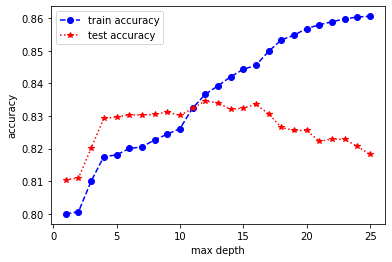

In [381]:
plt.plot(depths, accuracy_train, 'bo--')
plt.plot(depths, accuracy_test, 'r*:')
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.legend(['train accuracy', 'test accuracy'])
plt.show()

What's the top five features?

In [382]:
best_rfc = RandomForestClassifier(max_depth=best_depth)
best_rfc.fit(X_train, y_train)
feature_imp = pd.DataFrame(zip(X_train.columns, best_rfc.feature_importances_), columns=['feature', 'importance'])
print('Top five forest features: ')
print(feature_imp.sort_values('importance', ascending=False).iloc[0:5])

Top five forest features: 
          feature  importance
1    capital-gain    0.370119
0             age    0.248969
3  hours-per-week    0.140480
2    capital-loss    0.140439
4        sex_Male    0.078258


Create Additional Features and Re-Tune

Looking at the education feature, there are 16 unique values – from preschool to professional school. Rather than adding dummy variables for each value, it makes sense to bin some of these values together. While there are many ways to do this, we will take the approach of combining the values into 3 groups: High school and less, College to Bachelors and Masters and more.

In [383]:
education_label = ["HS or less", "College to Bachelors", "Masters or more"]

In [384]:
# Create a dataframe to select the right number
# reset_index(name='count') resets the index of the resulting DataFrame 
# and assigns the name 'count' to the count column.
education_series = df.groupby(["education", "education-num"]).size().reset_index(name='count')

In [385]:
education_series

,education,education-num,count
0,10th,6,933
1,11th,7,1175
2,12th,8,433
3,1st-4th,2,168
4,5th-6th,3,333
5,7th-8th,4,646
6,9th,5,514
7,Assoc-acdm,12,1067
8,Assoc-voc,11,1382
9,Bachelors,13,5355


In [386]:
df["education_bin"] = pd.cut(df["education-num"], [0, 9, 13, 16], labels=education_label)

In [387]:
df["education_bin"]

0        College to Bachelors
1        College to Bachelors
2                  HS or less
3                  HS or less
4        College to Bachelors
                 ...         
32556    College to Bachelors
32557              HS or less
32558              HS or less
32559              HS or less
32560              HS or less
Name: education_bin, Length: 32561, dtype: category
Categories (3, object): ['HS or less' < 'College to Bachelors' < 'Masters or more']

Include that feature

In [388]:
feature_cols = ['age',
       'capital-gain', 'capital-loss', 'hours-per-week', 
       'sex', 'race','education_bin']
X = pd.get_dummies(df[feature_cols], drop_first=True)

In [389]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=.2)

In [390]:
np.random.seed(0)
depths = range(1,10)
accuracy_train = []
accuracy_test = []

for d in depths:
    rfc = RandomForestClassifier(max_depth=d)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    accuracy_train.append(accuracy_score(y_train, rfc.predict(x_train)))
    accuracy_test.append(accuracy_score(y_test, rfc.predict(x_test)))

In [391]:
best_acc = np.max(accuracy_test)
best_depth = depths[np.argmax(accuracy_test)]
print(f'The highest accuracy on the test is achieved when depth: {best_depth}')
print(f'The highest accuracy on the test set is: {round(best_acc*100,3)}%')

The highest accuracy on the test is achieved when depth: 9
The highest accuracy on the test set is: 84.431%


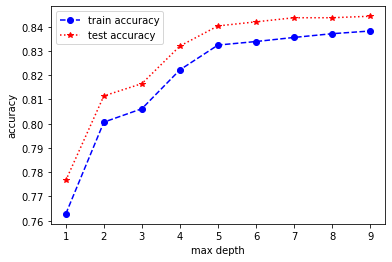

In [392]:
plt.plot(depths, accuracy_train, 'bo--')
plt.plot(depths, accuracy_test, 'r*:')
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.legend(['train accuracy', 'test accuracy'])
plt.show()

In [393]:
best_rfc = RandomForestClassifier(max_depth=best_depth)
best_rfc.fit(X_train, y_train)
feature_imp = pd.DataFrame(zip(X_train.columns, best_rfc.feature_importances_), columns=['feature', 'importance'])
print('Top five forest features: ')
print(feature_imp.sort_values('importance', ascending=False).iloc[0:5])

Top five forest features: 
                          feature  importance
1                    capital-gain    0.326836
0                             age    0.201973
10  education_bin_Masters or more    0.130849
3                  hours-per-week    0.102162
2                    capital-loss    0.095188
